In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(
        html_str.replace('table','table style="display:inline"'), 
        raw=True
    )

In [3]:
# df_dbt = pd.read_csv('./data/diabetes_012_health_indicators_BRFSS2015.csv')
df_dbt = pd.read_csv('./data/diabetes_binary_health_indicators_BRFSS2015.csv')


In [4]:
print(df_dbt.shape)

(253680, 22)


In [5]:
df_dbt.head(2)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


# Info.

In [6]:
df_dbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Statistically descriptive analysis


In [7]:
df_des = df_dbt.describe().T
df_des = df_des[["min", "mean", "50%", "max"]]
df_des.reset_index(inplace=True)
df_des.columns = ["column", "min", "mean", "median", "max"]
df_des

,column,min,mean,median,max
0,Diabetes_binary,0.0,0.139333,0.0,1.0
1,HighBP,0.0,0.429001,0.0,1.0
2,HighChol,0.0,0.424121,0.0,1.0
3,CholCheck,0.0,0.962670,1.0,1.0
4,BMI,12.0,28.382364,27.0,98.0
5,Smoker,0.0,0.443169,0.0,1.0
6,Stroke,0.0,0.040571,0.0,1.0
7,HeartDiseaseorAttack,0.0,0.094186,0.0,1.0
8,PhysActivity,0.0,0.756544,1.0,1.0
9,Fruits,0.0,0.634256,1.0,1.0


In [8]:
list_cols_numeric = ['BMI', 'GenHlth',
                    'MentHlth',
                    'PhysHlth',
                    'Age',
                    'Education',
                    'Income']
list_cols_all = df_dbt.columns.tolist()

list_cols_cat = [i for i in list_cols_all if i not in list_cols_numeric]


# Category Proportion

In [9]:
list_df_eda = []
for col in list_cols_cat:
#     print(col)
    df_eda = pd.DataFrame(df_dbt[col].value_counts()).reset_index()
    df_eda.columns = ['Category', 'Count']
    df_eda['Category'] = df_eda['Category'].astype(int)
    df_eda = df_eda.sort_values('Category')
    
    df_eda_norm = pd.DataFrame(df_dbt[col].value_counts(normalize=True)).reset_index()
    df_eda_norm.columns = ['Category', 'Count Percentage']
    df_eda_norm['Category'] = df_eda_norm['Category'].astype(int)
    df_eda_norm['Count Percentage'] = df_eda_norm['Count Percentage']*100
    df_eda_norm = df_eda_norm.sort_values('Category')
    df_eda = df_eda.merge(df_eda_norm, on='Category', how='left')
    df_eda['Feature'] = col
    df_eda = df_eda[['Feature', 'Category', 'Count', 'Count Percentage']]
#     display(df_eda)

    list_df_eda.append(df_eda)
#     print()
    
df_eda_all = pd.concat(list_df_eda, ignore_index=True)
df_eda_all

,Feature,Category,Count,Count Percentage
0,Diabetes_binary,0,218334,86.066698
1,Diabetes_binary,1,35346,13.933302
2,HighBP,0,144851,57.099890
3,HighBP,1,108829,42.900110
4,HighChol,0,146089,57.587906
5,HighChol,1,107591,42.412094
6,CholCheck,0,9470,3.733050
7,CholCheck,1,244210,96.266950
8,Smoker,0,141257,55.683144
9,Smoker,1,112423,44.316856


# Numeric Distribution

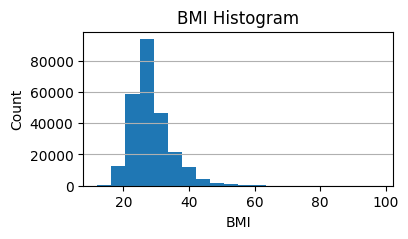

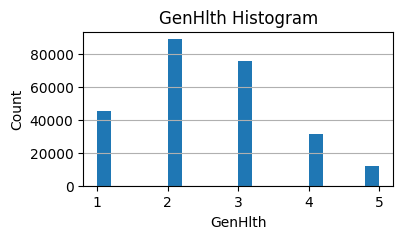

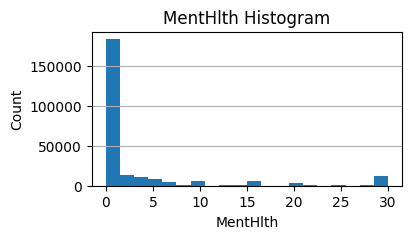

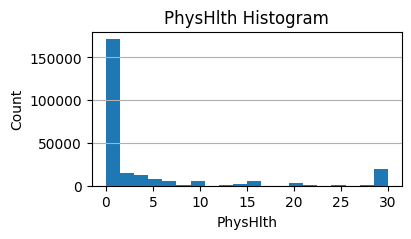

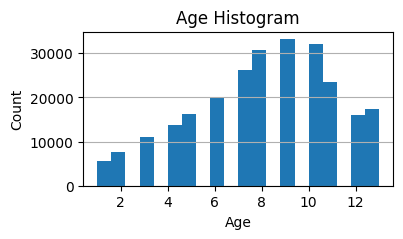

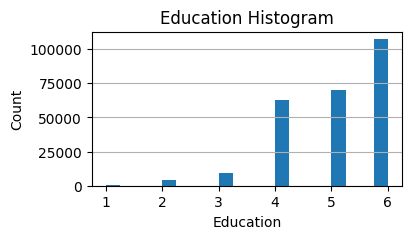

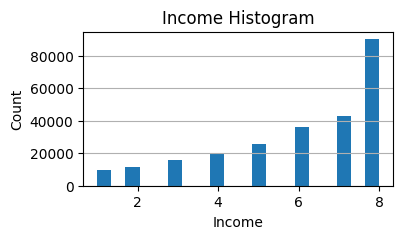

In [11]:
for col in list_cols_numeric:
    df_dbt[col].hist(bins=20, figsize=(4, 2))
    plt.title(f"{col} Histogram")
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.grid(axis = "x")
    plt.show()



# Correlation

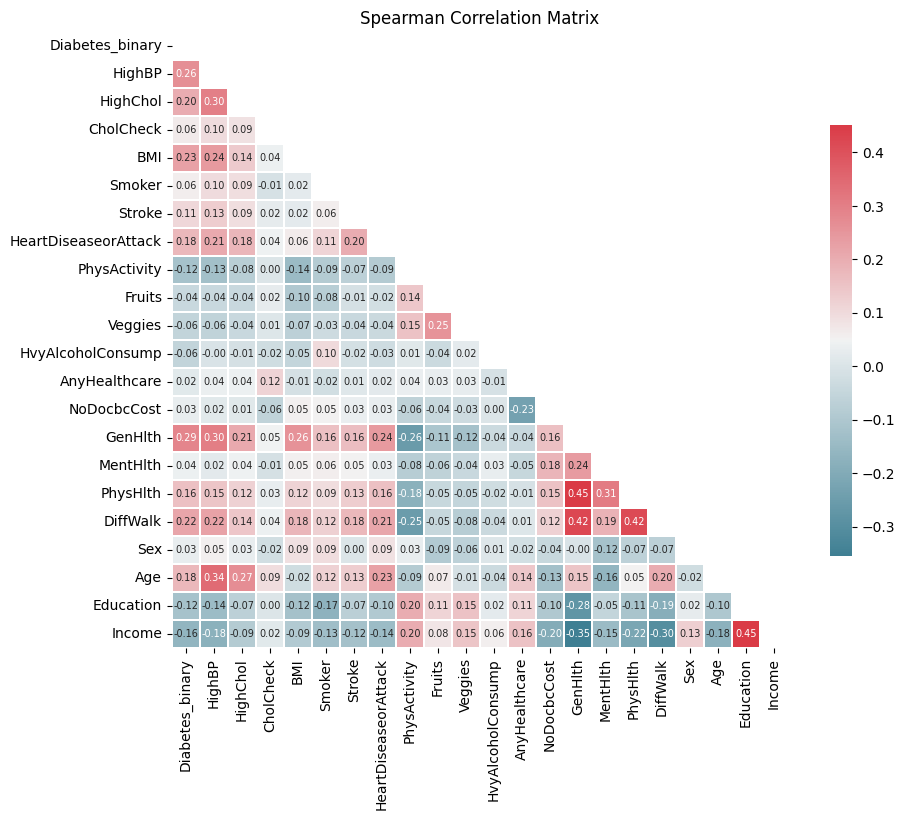

In [18]:
# Calculate the correlation matrix
corr_matrix = df_dbt.corr(method='spearman')

# Create a mask to hide one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Customize colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate the heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, square=True,
            annot=True, fmt='.2f', linewidths=.1, annot_kws={"size": 7}, cbar_kws={"shrink": 0.7})
plt.title('Spearman Correlation Matrix')
plt.show()


# VIF

In [10]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [11]:
df_dbt.columns[1:]

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [12]:
list_vif = []
list_feats = []
lr = LinearRegression()
for label in df_dbt.columns[1:]:
    x = df_dbt.drop(labels=['Diabetes_binary', label], axis=1)
    y = df_dbt[label]
    lr.fit(x, y)
    r2_val = r2_score(y, lr.predict(x))
    vif = 1/(1-r2_val)
#     print(f"VIF {label}\t: {vif:.2f}")
    list_vif.append(vif)
    list_feats.append(label)

In [16]:
df_vif

,Feature,VIF
0,GenHlth,1.795892
1,PhysHlth,1.623288
2,DiffWalk,1.533902
3,Income,1.503931
4,Age,1.349994
5,HighBP,1.330684
6,Education,1.326390
7,MentHlth,1.239297
8,HighChol,1.173313
9,HeartDiseaseorAttack,1.171917


In [13]:
df_vif = pd.DataFrame(data={'Feature': list_feats, 'VIF': list_vif})
df_vif = df_vif.sort_values('VIF', ascending=False).reset_index(drop=True)

split_no = 11
display_side_by_side(df_vif.iloc[:split_no], df_vif.iloc[split_no:])

,Feature,VIF
0,GenHlth,1.795892
1,PhysHlth,1.623288
2,DiffWalk,1.533902
3,Income,1.503931
4,Age,1.349994
5,HighBP,1.330684
6,Education,1.326390
7,MentHlth,1.239297
8,HighChol,1.173313
9,HeartDiseaseorAttack,1.171917


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [15]:
X = df_dbt.drop('Diabetes_binary', axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,HighBP,2.299761
1,HighChol,2.029660
2,CholCheck,23.187436
3,BMI,18.149913
4,Smoker,1.933042
5,Stroke,1.126777
6,HeartDiseaseorAttack,1.289820
7,PhysActivity,4.645314
8,Fruits,3.032775
9,Veggies,5.826886


# Block plot

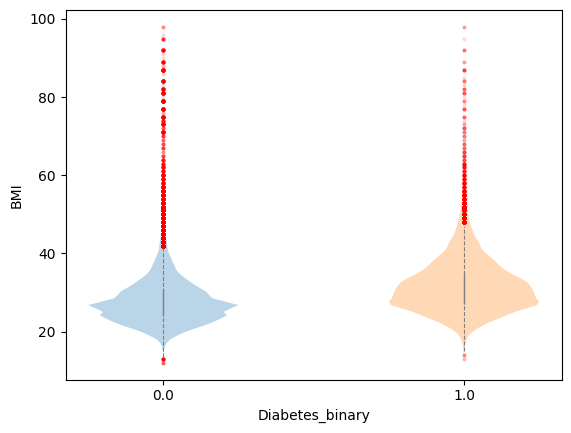

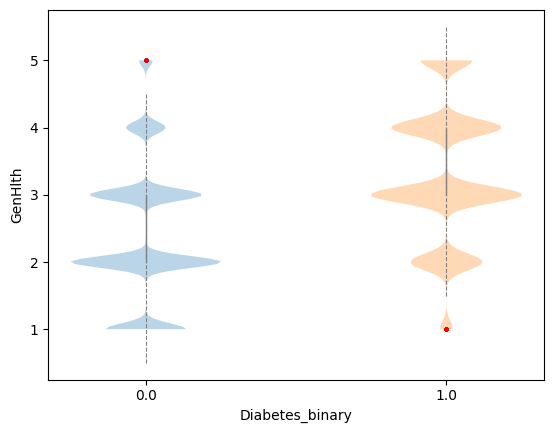

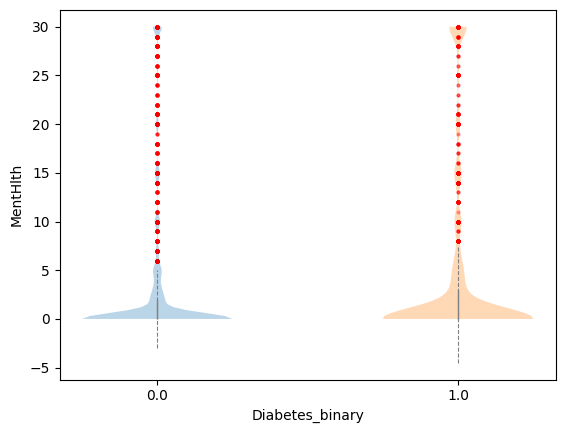

In [28]:

for i, feature in enumerate(['BMI', 'GenHlth', 'MentHlth']):
    
    fig, ax = plt.subplots()
    
    # Positions for each category
    positions = np.arange(len(df_dbt['Diabetes_binary'].unique()))

    # Iterate through categories
    for i, cat in enumerate(df_dbt['Diabetes_binary'].unique()):
        data_by_cat = df_dbt[df_dbt['Diabetes_binary'] == cat][feature]

        # Violin plot
        parts = ax.violinplot(data_by_cat, positions=[i], showmeans=False, showmedians=False, showextrema=False)

        # Outlier Detection
        q1, q3 = np.percentile(data_by_cat, [25, 75])
        iqr = q3 - q1
        outlier_limits = [q1 - 1.5*iqr, q3 + 1.5*iqr]
        outliers = data_by_cat[(data_by_cat < outlier_limits[0]) | (data_by_cat > outlier_limits[1])]

        # Plot outliers
        ax.scatter(np.full_like(outliers, i), outliers,  marker='.', c='red', s=15, alpha=0.1)
        
            # Plot whisker lines and outlier limits (optional)
        ax.vlines(i, q1, q3, color='gray', linestyle='-', lw=1) 
        ax.vlines(i, *outlier_limits, color='gray', linestyle='--', lw=0.8)  

        
    # Labels and adjustments
    ax.set_xticks(positions)
    ax.set_xticklabels(df_dbt['Diabetes_binary'].unique())
    plt.xlabel('Diabetes_binary')
    plt.ylabel(feature)
    plt.show()

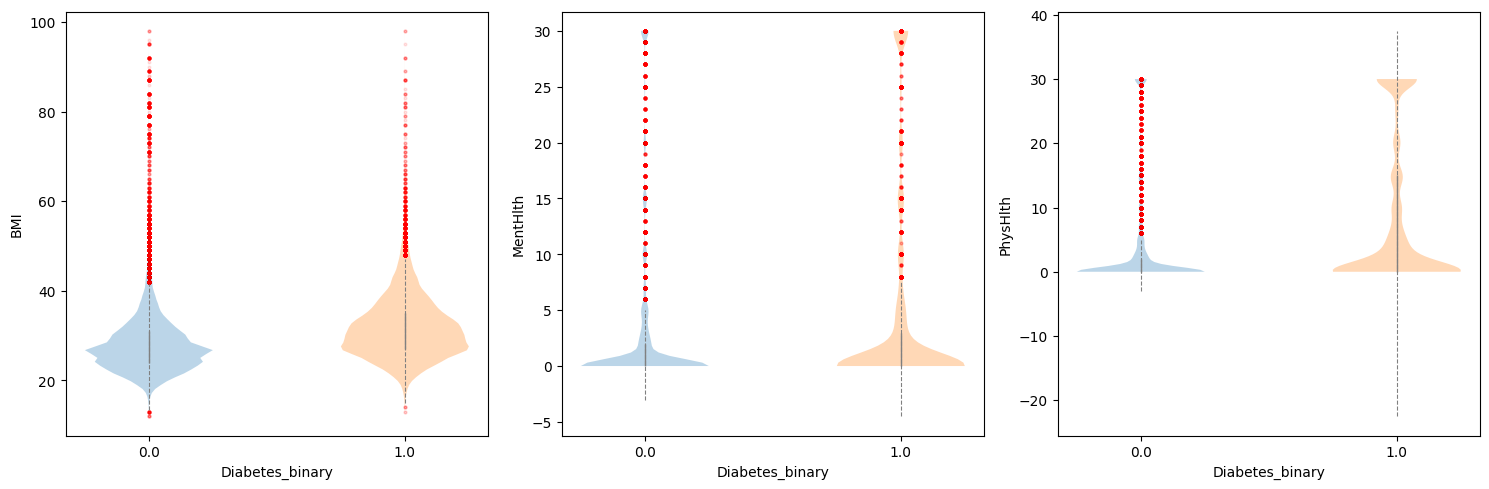

In [30]:
def plot_feature_distributions(df, features, diabetes_column):
    """Plots distributions of features by diabetes status with outlier detection.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        features (list): A list of feature column names to plot.
        diabetes_column (str): The name of the column containing diabetes status.
    """

    num_features = len(features)
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

    for i, feature in enumerate(features):
        ax = axes[i]

        positions = np.arange(len(df[diabetes_column].unique()))

        for j, cat in enumerate(df[diabetes_column].unique()):
            data_by_cat = df[df[diabetes_column] == cat][feature]

            parts = ax.violinplot(data_by_cat, positions=[j], showmeans=False, showmedians=False, showextrema=False)

            q1, q3 = np.percentile(data_by_cat, [25, 75])
            iqr = q3 - q1
            outlier_limits = [q1 - 1.5*iqr, q3 + 1.5*iqr]
            outliers = data_by_cat[(data_by_cat < outlier_limits[0]) | (data_by_cat > outlier_limits[1])]

            ax.scatter(np.full_like(outliers, j), outliers, marker='.', c='red', s=15, alpha=0.1)
            ax.vlines(j, q1, q3, color='gray', linestyle='-', lw=1) 
            ax.vlines(j, *outlier_limits, color='gray', linestyle='--', lw=0.8)  

        ax.set_xticks(positions)
        ax.set_xticklabels(df[diabetes_column].unique())
        ax.set_xlabel(diabetes_column)
        ax.set_ylabel(feature)

    plt.tight_layout()
    plt.show()

# Example Usage:       
features_to_plot = ['BMI', 'MentHlth', 'PhysHlth']  # Select features
diabetes_column = 'Diabetes_binary' 
plot_feature_distributions(df_dbt, features_to_plot, diabetes_column)